In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('abc_examiner', index_col=0)

/home/amanda/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question,no_stop,num_stopwords,percent_stop,num_words
0,2010-01-01,"['12m', 'degas', 'stolen', 'from', 'museum']",0,28,0,0,"['12m', 'degas', 'stolen', 'museum']",1,0.200000,4
1,2010-01-01,"['17', 'die', 'in', 'bangladesh', 'bus', 'crash']",0,30,0,0,"['17', 'die', 'bangladesh', 'bus', 'crash']",1,0.166667,5
2,2010-01-01,"['2010', 'to', 'be', 'drier', 'after', 'very',...",0,36,0,0,"['2010', 'drier', 'wet', '2009']",4,0.500000,4
3,2010-01-01,"['37', 'catholic', 'workers', 'killed', 'world...",0,36,0,0,"['37', 'catholic', 'workers', 'killed', 'world...",0,0.000000,5
4,2010-01-01,"['600', 'hurt', 'in', 'philippine', 'new', 'ye...",0,39,0,0,"['600', 'hurt', 'philippine', 'new', 'year', '...",1,0.142857,6


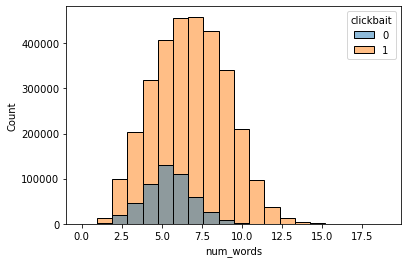

In [4]:
sns.histplot(df, x='num_words', hue='clickbait', bins=20)

In [5]:
df['publish_date'] = pd.to_datetime(df['publish_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582247 entries, 0 to 3582246
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_text      object        
 2   clickbait          int64         
 3   length             int64         
 4   contains_exclaim   int64         
 5   contains_question  int64         
 6   no_stop            object        
 7   num_stopwords      int64         
 8   percent_stop       float64       
 9   num_words          int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 300.6+ MB


In [20]:
df.describe()

,clickbait,length,contains_exclaim,contains_question,num_stopwords,percent_stop,num_words,year,month,index
count,986831.000000,986831.000000,986831.000000,986831.000000,986831.000000,986831.000000,986831.000000,986831.000000,986831.000000,492466.00000
mean,0.500962,46.539987,0.012133,0.028380,1.572534,0.188513,5.913410,2012.097061,6.376142,246232.50000
std,0.499999,17.105881,0.109479,0.166055,1.407558,0.144735,2.144773,1.652131,3.412843,142162.83317
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000,0.00000
25%,0.000000,34.000000,0.000000,0.000000,1.000000,0.090909,4.000000,2011.000000,3.000000,123116.25000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.166667,6.000000,2012.000000,6.000000,246232.50000
75%,1.000000,58.000000,0.000000,0.000000,2.000000,0.285714,7.000000,2013.000000,9.000000,369348.75000
max,1.000000,102.000000,1.000000,1.000000,15.000000,1.000000,19.000000,2015.000000,12.000000,492465.00000


In [32]:
#looks like there are healines with no non-stop words
df[df['num_words']<=1].head() #yes, these headlines are only stop words
df.loc[(df['length']<=5) and (df['num_words']<=2)].count()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Randomly selecting clickbait headlines to even out the data sets

In [6]:

#creating year and month columns to group by
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month
df.head()

,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question,no_stop,num_stopwords,percent_stop,num_words,year,month
0,2010-01-01,"['12m', 'degas', 'stolen', 'from', 'museum']",0,28,0,0,"['12m', 'degas', 'stolen', 'museum']",1,0.200000,4,2010,1
1,2010-01-01,"['17', 'die', 'in', 'bangladesh', 'bus', 'crash']",0,30,0,0,"['17', 'die', 'bangladesh', 'bus', 'crash']",1,0.166667,5,2010,1
2,2010-01-01,"['2010', 'to', 'be', 'drier', 'after', 'very',...",0,36,0,0,"['2010', 'drier', 'wet', '2009']",4,0.500000,4,2010,1
3,2010-01-01,"['37', 'catholic', 'workers', 'killed', 'world...",0,36,0,0,"['37', 'catholic', 'workers', 'killed', 'world...",0,0.000000,5,2010,1
4,2010-01-01,"['600', 'hurt', 'in', 'philippine', 'new', 'ye...",0,39,0,0,"['600', 'hurt', 'philippine', 'new', 'year', '...",1,0.142857,6,2010,1


In [7]:
df[df['clickbait']==0].count()

publish_date         492466
headline_text        492466
clickbait            492466
length               492466
contains_exclaim     492466
contains_question    492466
no_stop              492466
num_stopwords        492466
percent_stop         492466
num_words            492466
year                 492466
month                492466
dtype: int64

In [8]:
df[df['clickbait']==1].count()

publish_date         3089781
headline_text        3089781
clickbait            3089781
length               3089781
contains_exclaim     3089781
contains_question    3089781
no_stop              3089781
num_stopwords        3089781
percent_stop         3089539
num_words            3089781
year                 3089781
month                3089781
dtype: int64

In [9]:
df.fillna(0, inplace=True) #looks like percent_stop has some nan because the headline has 0 stop words

In [10]:
492466/3080781

0.15985102478884414

So we only want to keep 16% of the clickbait headlines.

For time I will just randomly select these from the df

In [11]:
c = df[df['clickbait']==1] #selecting clickbait headlines
c = c.sample(frac=0.16, random_state=1) #randomly selecting
c.count() 

publish_date         494365
headline_text        494365
clickbait            494365
length               494365
contains_exclaim     494365
contains_question    494365
no_stop              494365
num_stopwords        494365
percent_stop         494365
num_words            494365
year                 494365
month                494365
dtype: int64

In [12]:
#merging new clickbait selections with non clickbait 
nc = df[df['clickbait']==0].reset_index()
df = pd.concat([c, nc], ignore_index=True)

In [17]:
df.describe()

,clickbait,length,contains_exclaim,contains_question,num_stopwords,percent_stop,num_words,year,month,index
count,986831.000000,986831.000000,986831.000000,986831.000000,986831.000000,986831.000000,986831.000000,986831.000000,986831.000000,492466.00000
mean,0.500962,46.539987,0.012133,0.028380,1.572534,0.188513,5.913410,2012.097061,6.376142,246232.50000
std,0.499999,17.105881,0.109479,0.166055,1.407558,0.144735,2.144773,1.652131,3.412843,142162.83317
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000,0.00000
25%,0.000000,34.000000,0.000000,0.000000,1.000000,0.090909,4.000000,2011.000000,3.000000,123116.25000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.166667,6.000000,2012.000000,6.000000,246232.50000
75%,1.000000,58.000000,0.000000,0.000000,2.000000,0.285714,7.000000,2013.000000,9.000000,369348.75000
max,1.000000,102.000000,1.000000,1.000000,15.000000,1.000000,19.000000,2015.000000,12.000000,492465.00000


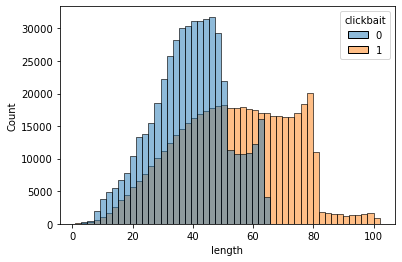

In [14]:
sns.histplot(df,bins=50, x='length', hue='clickbait')


,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question,no_stop,num_stopwords,percent_stop,num_words,year,month,index
9070,2010-06-30,"['who', 'are', 'you']",1,12,0,1,[],3,1.0,0,2010,6,NaN
18358,2010-04-29,['o'],1,1,0,0,[],1,1.0,0,2010,4,NaN
20192,2011-04-28,"['its', 'all', 'over', 'but', 'is', 'it']",1,28,0,1,[],6,1.0,0,2011,4,NaN
25679,2011-06-08,['t'],1,1,0,0,[],1,1.0,0,2011,6,NaN
30377,2012-05-23,"['we', 'are', 'the', 'same', 'you', 'and', 'i']",1,25,0,0,[],7,1.0,0,2012,5,NaN
